In [1]:
# importing dependecies
import pandas as pd
import numpy as np

In [2]:
# reading the data
data = pd .read_csv("../data/train_E1GspfA.csv")

In [3]:
# checking the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [4]:
# looks no missing entries
data.isna().sum()

date      0
hour      0
demand    0
dtype: int64

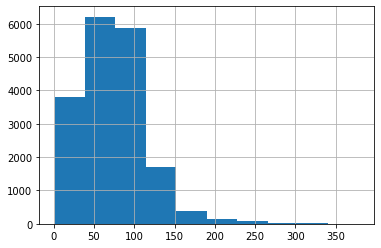

In [5]:
# seeing the distribution of demand 
data.demand.hist()

### need to add hours to data time

In [6]:
# convert hour to string
data['hour'] = data.hour.astype('str')

In [7]:
# create newdatetime data columns
data["newdatetime"] = data['date'] + ' ' + data['hour'] + ':00'

In [8]:
# check how it looks
data.head(5)

,date,hour,demand,newdatetime
0,2018-08-18,9,91,2018-08-18 9:00
1,2018-08-18,10,21,2018-08-18 10:00
2,2018-08-18,13,23,2018-08-18 13:00
3,2018-08-18,14,104,2018-08-18 14:00
4,2018-08-18,15,81,2018-08-18 15:00


In [9]:
# convert the newdatetime column to data time
data["newdatetime"] = pd.to_datetime(data["newdatetime"])

#### Creating new features
- Hour of day [done]
- day of month [done]
- month of year [done]
- year [done]
- quater of year [done]
- week of year [done]
- day of year [done]
- day of week 



In [10]:
data["hour_of_day"] = data["newdatetime"].dt.hour
data["day_of_month"] = data["newdatetime"].dt.day
data["month_of_year"] = data["newdatetime"].dt.month
data["year"] = data["newdatetime"].dt.year
data['quarter_of_year'] = data["newdatetime"].dt.quarter
data['week_of_year'] = data["newdatetime"].dt.week
data['day_of_year'] = data["newdatetime"].dt.dayofyear
data['day_of_week'] = data["newdatetime"].dt.dayofweek





In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             18247 non-null  object        
 1   hour             18247 non-null  object        
 2   demand           18247 non-null  int64         
 3   newdatetime      18247 non-null  datetime64[ns]
 4   hour_of_day      18247 non-null  int64         
 5   day_of_month     18247 non-null  int64         
 6   month_of_year    18247 non-null  int64         
 7   year             18247 non-null  int64         
 8   quarter_of_year  18247 non-null  int64         
 9   week_of_year     18247 non-null  int64         
 10  day_of_year      18247 non-null  int64         
 11  day_of_week      18247 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 1.7+ MB


In [12]:
data[["hour_of_day", "day_of_month", "month_of_year", "year", "quarter_of_year", \
"week_of_year", "day_of_year", "day_of_week", "newdatetime", "demand"]]

,hour_of_day,day_of_month,month_of_year,year,quarter_of_year,week_of_year,day_of_year,day_of_week,newdatetime,demand
0,9,18,8,2018,3,33,230,5,2018-08-18 09:00:00,91
1,10,18,8,2018,3,33,230,5,2018-08-18 10:00:00,21
2,13,18,8,2018,3,33,230,5,2018-08-18 13:00:00,23
3,14,18,8,2018,3,33,230,5,2018-08-18 14:00:00,104
4,15,18,8,2018,3,33,230,5,2018-08-18 15:00:00,81
...,...,...,...,...,...,...,...,...,...,...
18242,19,28,2,2021,1,8,59,6,2021-02-28 19:00:00,95
18243,20,28,2,2021,1,8,59,6,2021-02-28 20:00:00,88
18244,21,28,2,2021,1,8,59,6,2021-02-28 21:00:00,39
18245,22,28,2,2021,1,8,59,6,2021-02-28 22:00:00,104


In [13]:
data.columns

Index(['date', 'hour', 'demand', 'newdatetime', 'hour_of_day', 'day_of_month',
       'month_of_year', 'year', 'quarter_of_year', 'week_of_year',
       'day_of_year', 'day_of_week'],
      dtype='object')

### preparing data set for machine learning model

In [15]:
df = data.copy()

In [17]:
df = df.drop(["date", "hour", "newdatetime"], axis = 1)

In [18]:
df.head(5)

,demand,hour_of_day,day_of_month,month_of_year,year,quarter_of_year,week_of_year,day_of_year,day_of_week
0,91,9,18,8,2018,3,33,230,5
1,21,10,18,8,2018,3,33,230,5
2,23,13,18,8,2018,3,33,230,5
3,104,14,18,8,2018,3,33,230,5
4,81,15,18,8,2018,3,33,230,5


In [19]:
X = df.drop("demand", axis=1)
y = df.demand

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state =123)
print(f"shape of X_train, {X_train.shape}")
print(f"shape of X_test, {X_test.shape}")
print(f"shape of y_train, {y_train.shape}")
print(f"shape of y_test, {y_test.shape}")


shape of X_train, (13685, 8)
shape of X_test, (4562, 8)
shape of y_train, (13685,)
shape of y_test, (4562,)


In [22]:
from sklearn.ensemble import RandomForestRegressor

ran_reg = RandomForestRegressor()

In [23]:
ran_reg.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
y_pred = ran_reg.predict(X_test)

In [25]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred, squared=False)

32.9773403029205

In [26]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

In [27]:
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred, squared=False)

32.50257215854322

#### Tryout cross validation techniques

In [28]:
from sklearn.model_selection import cross_val_score

In [33]:
# for random forest regressor
scores = -(cross_val_score(ran_reg, X, y, cv=5, scoring="neg_mean_squared_error"))
print(f"random forest regression cross validation scores {np.sqrt(scores)}")

random forest regression cross validation scores [42.48746924 34.11840902 41.47047727 33.92058709 39.17594437]


In [34]:
# for xgboost regressor
scores = -(cross_val_score(xgb_reg, X, y, cv=5, scoring="neg_mean_squared_error"))
print(f"xgboost regression cross validation scores {np.sqrt(scores)}")

xgboost regression cross validation scores [40.79878986 33.60293816 39.04390039 33.761065   39.62646243]


In [ ]:
LGBMRegressor(bagging_fraction=0.9, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=61, min_child_weight=0.001, min_split_gain=0.7,
              n_estimators=290, n_jobs=-1, num_leaves=40, objective=None,
              random_state=123, reg_alpha=0.2, reg_lambda=0.2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)